In [24]:
pip install -U numpy --user

  Using cached numpy-1.21.0-cp37-cp37m-win_amd64.whl (13.9 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 1.7.0 requires dataclasses, which is not installed.
-ensorflow-gpu 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.0 which is incompatible.
tensorflow-gpu 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.0 which is incompatible.


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import re
import shutil
import glob
import gzip
%matplotlib inline

In [17]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, TimeDistributed, LSTM, Input, BatchNormalization, Conv2D, MaxPooling2D, Reshape, Conv1D, GlobalAveragePooling1D, MaxPooling1D, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy
from keras.losses import categorical_crossentropy

In [19]:
import tensorflow_hub as hub

In [20]:
import h5py

In [21]:
tf.test.is_built_with_cuda()

True

In [7]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [9]:
from PIL import Image

In [10]:
import gzip

In [11]:
from keras.preprocessing.sequence import pad_sequences

In [12]:
# import spacy
# from spacy.lang.de.examples import sentences 

# creating folder path

In [10]:
train_data_path = "D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\features\\fullFrame-210x260px\\train"
dev_data_path = "D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\features\\fullFrame-210x260px\\dev"
test_data_path = "D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\features\\fullFrame-210x260px\\test"

In [11]:
os.getcwd()

'D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\program files'

# creating directory for all files in an image folder

In [12]:
os.chdir(dev_data_path)

In [13]:
directory_train = os.listdir()

In [14]:
len(directory_train)

519

In [15]:
directory_train[70]

'04May_2011_Wednesday_heute-3996'

In [16]:
directory_train[76]

'05February_2010_Friday_tagesschau-2919'

# creating dataset with yield


In [20]:
 #pip install --upgrade tensorflow-hub

In [17]:
import tensorflow_hub as hub
#hub_handle = 'https://tfhub.dev/deepmind/mil-nce/s3d/1'
hub_handle = "https://tfhub.dev/deepmind/mil-nce/i3d/1"
hub_model = hub.load(hub_handle)

def generate_embeddings(model, input_frames):
  """Generate embeddings from the model from video frames and input words."""
  # Input_frames must be normalized in [0, 1] and of the shape Batch x T x H x W x 3
  vision_output = model.signatures['video'](tf.constant(tf.cast(input_frames, dtype=tf.float32)))
  #text_output = model.signatures['text'](tf.constant(input_words))
  return vision_output['video_embedding']

In [18]:
#hub_extractor = hub.load(hub_handle)

In [19]:
#hub_extractor.trainable = True

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as trans

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
device


device(type='cuda')

In [ ]:
# batch_size = 8
# #training_data=[]
# total_frame=109
# skip_frame=5


# def gray_data(current_folder_no):
#     folder_no=0
#     fol = 0
    
#     #training_annot = np.array
    
    
# #     for i in range(current_folder_no,current_folder_no+batch_size):
# #         nlp = spacy.load("de_core_news_lg")
# #         doc = nlp(annotaion_data_values[i])
    
    
    
    
    
#     while (current_folder_no<8):
#         training_data=np.empty([0,252,224,3],dtype=np.float32)
#         #training_data=[]

#         for j in range(current_folder_no,current_folder_no+batch_size):
#             temp_path = train_data_path+"\\"+directory_train[j]
#             os.chdir(temp_path)
#             frame_count=0
#             frame_incl = 0
            
#             print(j)

#             for i in range(0,len(os.listdir()),5):

#                 frame_incl=frame_incl+1
#                 try:
#                     ##########################################
#                     #if we want gray scale images
#                     #img_array=cv2.imread(os.listdir()[i],cv2.IMREAD_GRAYSCALE)
#                     ##########################################
#                     img_array = cv2.imread(os.listdir()[i])
#                     img_temp = cv2.resize(img_array,(224,252))/255.
#                     #print(img_temp.shape)
#                     #norm_image = cv2.normalize(img_temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                    # img_temp =img_temp/255.
#                     #img_temp = np.divide(img_temp,[255.])
#     #                 if(frame_count==1):
#     #                     print(img_array.shape)
#     #                     print(img_array)
#                     #print("img_array shape is",np.shape(img_array))
#                     #new_array=cv2.resize(img_array,(Img_size,Img_size))



#                     #training_data.append(img_temp)
                
#                     training_data=np.append(training_data,[img_temp],axis = 0)
#                     #print("training_data shape is" ,np.shape(training_data))
#                 except Exception:
#                         print("error at first try")
#                 print("frame_included in real img",frame_incl)
#                 #print("frame_count in real img",frame_count)
#             while(frame_incl<total_frame):
#                 frame_incl=frame_incl+1
#                 try:
#                      ##########################################
#                     #if we want gray scale images
#                     #img_array=cv2.imread(os.listdir()[-1],cv2.IMREAD_GRAYSCALE)
#                     ##########################################
#                     img_array=cv2.imread(os.listdir()[-1])
#                     img_temp = cv2.resize(img_array,(224,252))/255.
#                     #print(img_temp.shahpe)
#                     #norm_image = cv2.normalize(img_temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                     #img_temp = img_temp/255.
#                     #img_temp = np.divide(img_temp,[255.])
#     #                 if(frame_count==1):
#     #                     print(img_array.shape)
#     #                     print(img_array)
#                     #print("img_array shape is",np.shape(img_array))
#                     #new_array=cv2.resize(img_array,(Img_size,Img_size))
#                     #training_data.append(img_temp)
#                     training_data = np.append(training_data,[img_temp],axis=0)
#                     #print("training_data shape is" ,np.shape(training_data))
#                 except Exception:
#                         print("error")
#                 print("frames_incl in copies are ",frame_incl)
#             print("folder no",folder_no)
#             folder_no=folder_no+1
#             #fol+=1
#         current_folder_no=current_folder_no+batch_size
#        # print(current_folder_no)



            
#         print(training_data.shape)

#         yield (current_folder_no,training_data)
        
    






In [ ]:
# current_folder_no =0
# temp = gray_data(current_folder_no)
# training_data =np.empty([0,872,224,224,3],dtype = np.float32)
# for a,training_data_temp in temp:
#     print("temp data shape",training_data_temp.shape)
#     training_data = np.append(training_data,[training_data_temp],axis=0)
#     current_folder = a

 # temp model to reshape

In [ ]:
# batch_size = 2
# #training_data=[]
# total_frame=128
# skip_frame=5
# folder_name = []


# def gray_data(current_folder_no):
#     folder_no=0
#     fol_no = current_folder_no+folder_no
    
    
#     #training_annot = np.array
    
    
# #     for i in range(current_folder_no,current_folder_no+batch_size):
# #         nlp = spacy.load("de_core_news_lg")
# #         doc = nlp(annotaion_data_values[i])
    
    
    
    
    
#     while (current_folder_no<=519):
#         training_data=np.empty([0,252,224,3],dtype=np.float32)
#         #training_data=[]
#         #folder_name = np.empty([0])

#         for j in range(current_folder_no,current_folder_no+batch_size):
#             temp_path = dev_data_path+"\\"+directory_train[j]
#             folder_name.append(directory_train[j])
#             #folder_name = np.append(folder_name ,directory_train[j],axis=0)
#             print('*******************************************')
#             print("current folder is",directory_train[j])
#             print('*******************************************')
#             os.chdir(temp_path)
#             frame_count=0
#             frame_incl = 0
            
#             print(j)

#             for i in range(0,len(os.listdir()),5):

#                 frame_incl=frame_incl+1
#                 try:
#                     ##########################################
#                     #if we want gray scale images
#                     #img_array=cv2.imread(os.listdir()[i],cv2.IMREAD_GRAYSCALE)
#                     ##########################################
#                     img_array = cv2.imread(os.listdir()[i])
#                     img_temp = cv2.resize(img_array,(224,252))/255.
#                     #print(img_temp.shape)
#                     #norm_image = cv2.normalize(img_temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                    # img_temp =img_temp/255.
#                     #img_temp = np.divide(img_temp,[255.])
#     #                 if(frame_count==1):
#     #                     print(img_array.shape)
#     #                     print(img_array)
#                     #print("img_array shape is",np.shape(img_array))
#                     #new_array=cv2.resize(img_array,(Img_size,Img_size))



#                     #training_data.append(img_temp)
                
#                     training_data=np.append(training_data,[img_temp],axis = 0)
#                     #print("training_data shape is" ,np.shape(training_data))
#                 except Exception:
#                         print("error at first try")
#                 print("frame_included in real img",frame_incl)
#                 #print("frame_count in real img",frame_count)
#             while(frame_incl<total_frame):
#                 frame_incl=frame_incl+1
#                 try:
#                      ##########################################
#                     #if we want gray scale images
#                     #img_array=cv2.imread(os.listdir()[-1],cv2.IMREAD_GRAYSCALE)
#                     ##########################################
#                     img_array=cv2.imread(os.listdir()[-1])
#                     img_temp = cv2.resize(img_array,(224,252))/255.
#                     #print("img_temp_shape",img_temp.shape)
#                     #norm_image = cv2.normalize(img_temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#                     #img_temp = img_temp/255.
#                     #img_temp = np.divide(img_temp,[255.])
#     #                 if(frame_count==1):
#     #                     print(img_array.shape)
#     #                     print(img_array)
#                     #print("img_array shape is",np.shape(img_array))
#                     #new_array=cv2.resize(img_array,(Img_size,Img_size))
#                     #training_data.append(img_temp)
#                     training_data = np.append(training_data,[img_temp],axis=0)
#                     #print("training_data shape is" ,np.shape(training_data))
#                 except Exception:
#                         print("error")
#                 print("frames_incl in copies are ",frame_incl)
#             print("folder no today",folder_no)
#             print("folder no so far ",fol_no)
#             folder_no=folder_no+1
#             fol_no = fol_no+1
#             #fol+=1
#         current_folder_no=current_folder_no+batch_size
#        # print(current_folder_no)



            
#         print(training_data.shape)

#         yield (current_folder_no,training_data)
        
    






In [ ]:
# current_folder_no =518
# temp = gray_data(current_folder_no)
# training_data =np.empty([0,256,252,224,3],dtype = np.float32)
# vid_embdng = np.empty([0,512])
# #folder_name = np.empty([0])
# for a,training_data_temp,in temp:
#     print("sahep hello",training_data_temp.shape)
#     training_temp = training_data_temp.reshape(2,128,252,224,3)
#     plt.imshow(training_temp[0,0])
#     vid_embdd= generate_embeddings(hub_model,training_temp)
#     vid_embdng = np.append(vid_embdng,vid_embdd,axis=0)
    
#     print("embdd shape",vid_embdd.shape)
#     #print(vid_embdd)
#     print("current folder not is",a)
    
#     # changing directory
#     file_directory ="D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\program files"
#     os.chdir(file_directory)
#     path_emb = os.getcwd()
    
#     if(os.path.exists(path_emb+"\\emb_comp_i3d_dev.h5")):
    
#         with h5py.File('emb_comp_i3d_dev.h5','a') as hf:
#             hf['x_1'].resize((hf['x_1'].shape[0]+vid_embdd.shape[0]),axis = 0)
#             hf['x_1'][-vid_embdd.shape[0]:] = vid_embdd
#     else:
#         with h5py.File('emb_comp_i3d_dev.h5','w') as hf:
#             hf.create_dataset('x_1',data=vid_embdng,maxshape=(None,None),chunks=(1,512))
            
            
            
# #     if(os.path.exists(path_emb+"\\folder_name.h5")):
    
# #         with h5py.File('folder_name.h5','a') as hf:
# #             hf['x_2'].resize((hf['x_2'].shape[0]+folder_name.shape[0]),axis = 0)
# #             hf['x_2'][-folder_name.shape[0]:] = folder_name
# #     else:
# #         with h5py.File('folder_name.h5','w') as hf:
# #             hf.create_dataset('x_2',data=folder_name)
#     with h5py.File('emb_comp_i3d_dev.h5','r')as ab:
#     #ind = ab.keys()
#     #print(ind)
#         data_emb=ab['x_1'][()]
#     print("embedding shape is ",data_emb.shape)
        
    
# print("shape of emb",vid_embdng.shape)
    

In [ ]:
os.getcwd()

# appending with 0 instead with last frame

In [21]:
batch_size = 1
#training_data=[]
total_frame=128
skip_frame=5
folder_name = []


def gray_data(current_folder_no):
    folder_no=0
    fol_no = current_folder_no+folder_no
    
    
    #training_annot = np.array
    
    
#     for i in range(current_folder_no,current_folder_no+batch_size):
#         nlp = spacy.load("de_core_news_lg")
#         doc = nlp(annotaion_data_values[i])
    
    
    
    
    
    while (current_folder_no<=519):
        training_data=np.empty([0,252,224,3],dtype=np.float32)
        #training_data=[]
        #folder_name = np.empty([0])

        for j in range(current_folder_no,current_folder_no+batch_size):
            temp_path = dev_data_path+"\\"+directory_train[j]
            folder_name.append(directory_train[j])
            #folder_name = np.append(folder_name ,directory_train[j],axis=0)
            print('*******************************************')
            print("current folder is",directory_train[j])
            print('*******************************************')
            os.chdir(temp_path)
            frame_count=0
            frame_incl = 0
            
            print(j)

            for i in range(0,len(os.listdir()),5):

                frame_incl=frame_incl+1
                try:
                    ##########################################
                    #if we want gray scale images
                    #img_array=cv2.imread(os.listdir()[i],cv2.IMREAD_GRAYSCALE)
                    ##########################################
                    img_array = cv2.imread(os.listdir()[i])
                    img_temp = cv2.resize(img_array,(224,252))/255.
                    
                    #print(img_temp.shape)
                    #norm_image = cv2.normalize(img_temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                   # img_temp =img_temp/255.
                    #img_temp = np.divide(img_temp,[255.])
    #                 if(frame_count==1):
    #                     print(img_array.shape)
    #                     print(img_array)
                    #print("img_array shape is",np.shape(img_array))
                    #new_array=cv2.resize(img_array,(Img_size,Img_size))



                    #training_data.append(img_temp)
                
                    training_data=np.append(training_data,[img_temp],axis = 0)
                    #print("training_data shape is" ,np.shape(training_data))
                except Exception:
                        print("error at first try")
                print("frame_included in real img",frame_incl)
                #print("frame_count in real img",frame_count)
            while(frame_incl<total_frame):
                frame_incl=frame_incl+1
                try:
                     ##########################################
                    #if we want gray scale images
                    #img_array=cv2.imread(os.listdir()[-1],cv2.IMREAD_GRAYSCALE)
                    ##########################################
                    #img_array=cv2.imread(os.listdir()[-1])
                    #img_temp = cv2.resize(img_array,(224,252))/255.
                    img_temp = np.zeros((252,224,3))
                    #print("img_temp_shape",img_temp.shape)
                    #norm_image = cv2.normalize(img_temp, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    #img_temp = img_temp/255.
                    #img_temp = np.divide(img_temp,[255.])
    #                 if(frame_count==1):
    #                     print(img_array.shape)
    #                     print(img_array)
                    #print("img_array shape is",np.shape(img_array))
                    #new_array=cv2.resize(img_array,(Img_size,Img_size))
                    #training_data.append(img_temp)
                    training_data = np.append(training_data,[img_temp],axis=0)
                    #print("training_data shape is" ,np.shape(training_data))
                except Exception:
                        print("error")
                print("frames_incl in copies are ",frame_incl)
            print("folder no today",folder_no)
            print("folder no so far ",fol_no)
            folder_no=folder_no+1
            fol_no = fol_no+1
            #fol+=1
        current_folder_no=current_folder_no+batch_size
       # print(current_folder_no)



            
        print(training_data.shape)

        yield (current_folder_no,training_data)
        
    






*******************************************
current folder is 31October_2009_Saturday_tagesschau-7147_dev
*******************************************
518
frame_included in real img 1
frame_included in real img 2
frame_included in real img 3
frame_included in real img 4
frame_included in real img 5
frame_included in real img 6
frame_included in real img 7
frame_included in real img 8
frame_included in real img 9
frame_included in real img 10
frame_included in real img 11
frame_included in real img 12
frame_included in real img 13
frame_included in real img 14
frame_included in real img 15
frame_included in real img 16
frame_included in real img 17
frame_included in real img 18
frame_included in real img 19
frame_included in real img 20
frame_included in real img 21
frame_included in real img 22
frame_included in real img 23
frame_included in real img 24
frame_included in real img 25
frame_included in real img 26
frame_included in real img 27
frame_included in real img 28
frames_incl in 

IndexError: list index out of range

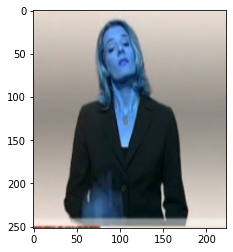

In [22]:
with tf.device('/gpu:0'):
    current_folder_no =518
    temp = gray_data(current_folder_no)
    #training_data =np.empty([0,256,252,224,3],dtype = np.float32)
    vid_embdng = np.empty([0,512])
    #folder_name = np.empty([0])
    for a,training_data_temp,in temp:
        print("sahep hello",training_data_temp.shape)
        training_temp = training_data_temp.reshape(1,128,252,224,3)
        plt.imshow(training_temp[0,0])
        vid_embdd= generate_embeddings(hub_model,training_temp)
        vid_embdng = np.append(vid_embdng,vid_embdd,axis=0)

        print("embdd shape",vid_embdd.shape)
        #print(vid_embdd)
        print("current folder not is",a)

        # changing directory
        file_directory ="D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\program files"
        os.chdir(file_directory)
        path_emb = os.getcwd()

        if(os.path.exists(path_emb+"\\emb_comp_i3d_dev_zero.h5")):

            with h5py.File('emb_comp_i3d_dev_zero.h5','a') as hf:
                hf['x_1'].resize((hf['x_1'].shape[0]+vid_embdd.shape[0]),axis = 0)
                hf['x_1'][-vid_embdd.shape[0]:] = vid_embdd
        else:
            with h5py.File('emb_comp_i3d_dev_zero.h5','w') as hf:
                hf.create_dataset('x_1',data=vid_embdng,maxshape=(None,None),chunks=(1,512))



    #     if(os.path.exists(path_emb+"\\folder_name.h5")):

    #         with h5py.File('folder_name.h5','a') as hf:
    #             hf['x_2'].resize((hf['x_2'].shape[0]+folder_name.shape[0]),axis = 0)
    #             hf['x_2'][-folder_name.shape[0]:] = folder_name
    #     else:
    #         with h5py.File('folder_name.h5','w') as hf:
    #             hf.create_dataset('x_2',data=folder_name)
#         with h5py.File('emb_comp_i3d_train_zero.h5','r')as ab:
#         #ind = ab.keys()
#         #print(ind)
#             data_emb=ab['x_1'][()]
#         print("embedding shape is ",data_emb.shape)


    #print("shape of emb",vid_embdng.shape)


In [21]:
current_folder = 6716

In [29]:
folder_showing = 6722

In [ ]:
print(folder_name)

In [ ]:
# file_directory ="D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\program files"
# os.chdir(file_directory)
# folder_name_temp = folder_name
# with h5py.File('folder_name_temp.h5','w')as ab:
#     #ind = ab.keys()
#     #print(ind)
#     ab.create_dataset('x_2',data=folder_name)

In [ ]:

# with h5py.File('folder_name_temp.h5','r')as ab:
#     #ind = ab.keys()
#     #print(ind)
#     folder_name_rama=ab['x_2'][()]

In [ ]:
folder_name_rama

In [ ]:
emb_new_i3d=5001

In [ ]:
emb_com = 4109

# writing h5 file for embedding

In [22]:
import h5py

In [ ]:
file_directory ="D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\program files"

In [ ]:
os.chdir(file_directory)

In [ ]:
# image matrix of training_data


In [ ]:
# with h5py.File('emb.h5','w') as hf:
#     hf.create_dataset('x_1',data=vid_embdng,maxshape=(None,None),chunks=(1,512))

# reading file

In [ ]:
# reading folder name 


In [23]:

with h5py.File('emb_comp_i3d_dev_zero.h5','r')as ab:
    #ind = ab.keys()
    #print(ind)
    data_emb=ab['x_1'][()]

In [24]:
data_emb.shape

(519, 512)

In [ ]:
data_emb[0]

In [ ]:
type(data_emb[0])


In [40]:
for i in range(7096):
    for j in range(i+1,7096):
        #print(np.array_equal(data_emb[i],data_emb[j]))
        if(np.array_equal(data_emb[i],data_emb[j])==True):
            print(i)
            print(j)
            print("True")
        
    #print(False)

In [31]:
data_emb[6721]

array([ 9.40702669e-03, -3.95510942e-02, -3.18033155e-03, -3.03774886e-03,
       -7.97425769e-03,  2.61989981e-03,  1.77527387e-02, -2.86171120e-02,
       -1.02123842e-02, -8.54864996e-03, -1.12974243e-02, -2.52160151e-02,
        9.85692441e-03,  3.34465411e-04,  1.09517435e-02, -6.49927482e-02,
       -3.39455903e-03, -1.07792169e-02, -2.64213327e-03, -6.79793432e-02,
        2.06846893e-02,  5.16372267e-03, -2.18553515e-03,  2.10058708e-02,
        1.23366984e-02, -2.10401583e-02, -1.27018243e-02,  1.62948165e-02,
        2.45746896e-02, -3.82349407e-03, -6.60401396e-03,  4.60922718e-02,
        2.19598692e-02,  1.62644349e-02,  2.03977749e-02,  7.32390862e-03,
        1.51539305e-02,  5.52137271e-02, -1.53410193e-02, -5.21156378e-02,
       -8.04456975e-03,  3.86897065e-02, -2.89634010e-03, -2.00816803e-02,
       -1.39601799e-02, -2.98580248e-03, -2.10180096e-02,  2.19814479e-04,
       -3.02690901e-02, -1.39943473e-02, -8.46559182e-04,  1.42946392e-02,
        1.35827735e-02,  

In [ ]:
type(training_data)

In [ ]:
training_data.shape

In [ ]:
len(training_data)

In [ ]:
plt.imshow(training_data[0][0])

In [ ]:
plt.imshow(training_data[0][1])

training_data = np.array(training_data,dtype = np.float32)

In [ ]:
training_data[0]

In [ ]:
training_data.shape

In [ ]:
plt.imshow(training_data[0,0])

# creating h5py file

In [ ]:
import h5py

In [ ]:


# changing current working directory to program files

file_directory ="D:\\imp docs\\sem4\\dn\\phoenix t\\PHOENIX-2014-T-release-v3\\PHOENIX-2014-T\\program files"



In [ ]:
os.chdir(file_directory)

In [ ]:
os.getcwd()

In [ ]:
with h5py.File('x_gray_yield.h5','w') as hf:
    hf.create_dataset('x_1',data=training_data,maxshape=(None,None,None,None,None),chunks=(1,872,224,224,3))

# reading h5py files

In [ ]:

with h5py.File('x_gray_yield.h5','r')as ab:
    ind = ab.keys()
    print(ind)
    data=ab['x_1'][()]

In [ ]:
data.shape

In [ ]:
type(data)

In [ ]:
type(data[0,0])

In [ ]:
plt.imshow(data[0,0])

# creating pretrained model

In [ ]:
import tensorflow_hub as hub

In [ ]:
import tensorflow_hub as hub
#hub_handle = 'https://tfhub.dev/deepmind/mil-nce/s3d/1'
hub_handle = "https://tfhub.dev/deepmind/mil-nce/i3d/1"
hub_model = hub.load(hub_handle)

def generate_embeddings(model, input_frames):
  """Generate embeddings from the model from video frames and input words."""
  # Input_frames must be normalized in [0, 1] and of the shape Batch x T x H x W x 3
  vision_output = model.signatures['video'](tf.constant(tf.cast(input_frames, dtype=tf.float32)))
  #text_output = model.signatures['text'](tf.constant(input_words))
  return vision_output['video_embedding']

In [ ]:
training_data.shape

In [ ]:
temp_data=data[0,0:109]

In [ ]:
temp_data.shape

vid_embdd= generate_embeddings(hub_model,[temp_data])